In [108]:
#%watermark -a "Chibuzor Enyioko" -d -t -v -p numpy,pandas,matplotlib

# Project 3: Unsupervised Learning

This project explores unsupervised learning methods through clustering. 

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

## Part 1: Cleaning the data sets

In [123]:
# importing the data sets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

hospital_data = pd.read_csv('hospital.csv')
x_data = hospital_data.copy()

# drop unwanted columns (assign result back)
x_data = x_data.drop(columns=['patient_nbr','encounter_id', 'admission_type_id','discharge_disposition_id','admission_source_id','payer_code','medical_specialty', 'readmitted'])
x_num = x_data.select_dtypes(include=[np.number])

x_num.replace("?", np.nan, inplace=True)
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
x_data_imp = imp.fit_transform(x_num)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data_imp)

X_pca = PCA(n_components=8).fit_transform(x_scaled)


In [124]:

hospital_data_imp_df = pd.DataFrame(X_pca, columns=x_num.columns)
# Try different cluster counts
for n in range(2, 9):
    kmeans = KMeans(n_clusters=n, random_state=42)
    clusters = kmeans.fit_predict(hospital_data_imp_df)
    silhouette_avg = silhouette_score(hospital_data_imp_df, clusters)
    print(f"For n_clusters = {n}, silhouette_score = {silhouette_avg}")



For n_clusters = 2, silhouette_score = 0.21163513726968308
For n_clusters = 3, silhouette_score = 0.20618285877866982
For n_clusters = 4, silhouette_score = 0.16564863448616393
For n_clusters = 5, silhouette_score = 0.1763848212718765
For n_clusters = 6, silhouette_score = 0.1808103720288357
For n_clusters = 7, silhouette_score = 0.18765983900465807
For n_clusters = 8, silhouette_score = 0.16343446917373747


## Part 2: Questions
### Hospital Data set

1. Run k-Means on the dataset and identify the best number (between 2 and 8)
of clusters (hint – Silhouette Scores on the right side of the k-Means box). Report this
number and its silhouette score. For non-technical track students – you may see an error
regarding the max number of allowed rows for the Hospital dataset. Report the scores that
you see regardless.


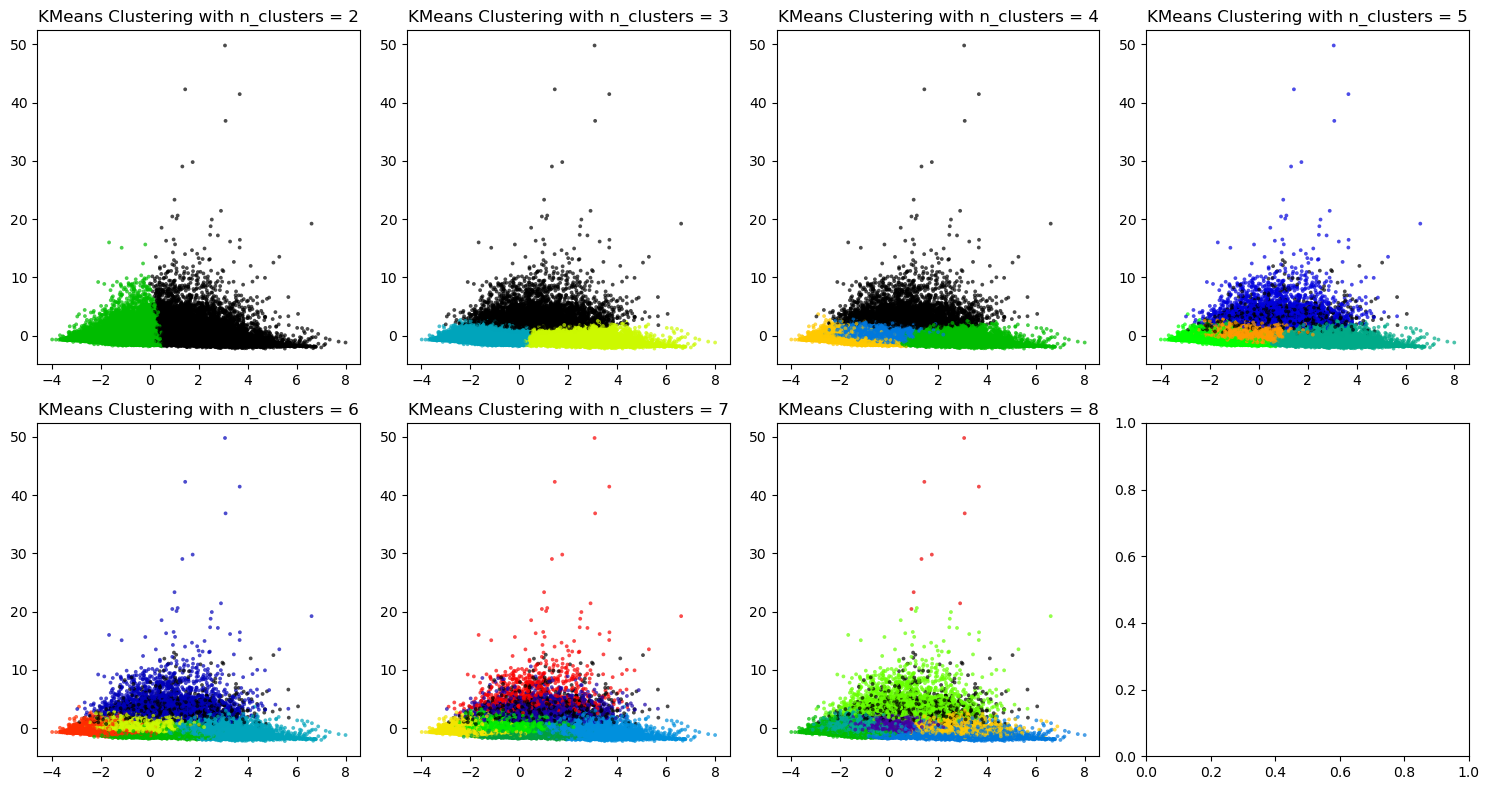

In [125]:
# plotting k means
from matplotlib import cm

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

n_clusters = range(2, 9)
for i, n in enumerate(n_clusters):
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(hospital_data_imp_df)
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    axes[i].scatter(hospital_data_imp_df.iloc[:, 0], hospital_data_imp_df.iloc[:, 1],
                    marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    axes[i].set_title(f'KMeans Clustering with n_clusters = {n}')

plt.tight_layout()
plt.show()



3. Pick the best 5 features by “Information Gain”, and attempt Q1 again. Use the
Rank widget.


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information for each feature
y = hospital_data['readmitted']

# Mutual information scores
mi_scores = mutual_info_classif(hospital_data_imp_df, y)

# Build dataframe
mi_df = pd.DataFrame({'feature': hospital_data_imp_df.columns, 'mi_score': mi_scores})
mi_df = mi_df.sort_values(by='mi_score', ascending=False).reset_index(drop=True)

print(mi_df.head(5))


              feature  mi_score
0  num_lab_procedures  0.030220
1   number_outpatient  0.019802
2    number_emergency  0.018741
3     num_medications  0.008357
4      num_procedures  0.008271


For n_clusters = 2, the average silhouette_score is : 0.19733190436224887
For n_clusters = 3, the average silhouette_score is : 0.23663681666945208
For n_clusters = 4, the average silhouette_score is : 0.230277455607965
For n_clusters = 5, the average silhouette_score is : 0.24890485824548533
For n_clusters = 6, the average silhouette_score is : 0.2596435047199022
For n_clusters = 7, the average silhouette_score is : 0.26496991720706997
For n_clusters = 8, the average silhouette_score is : 0.23804085624884916


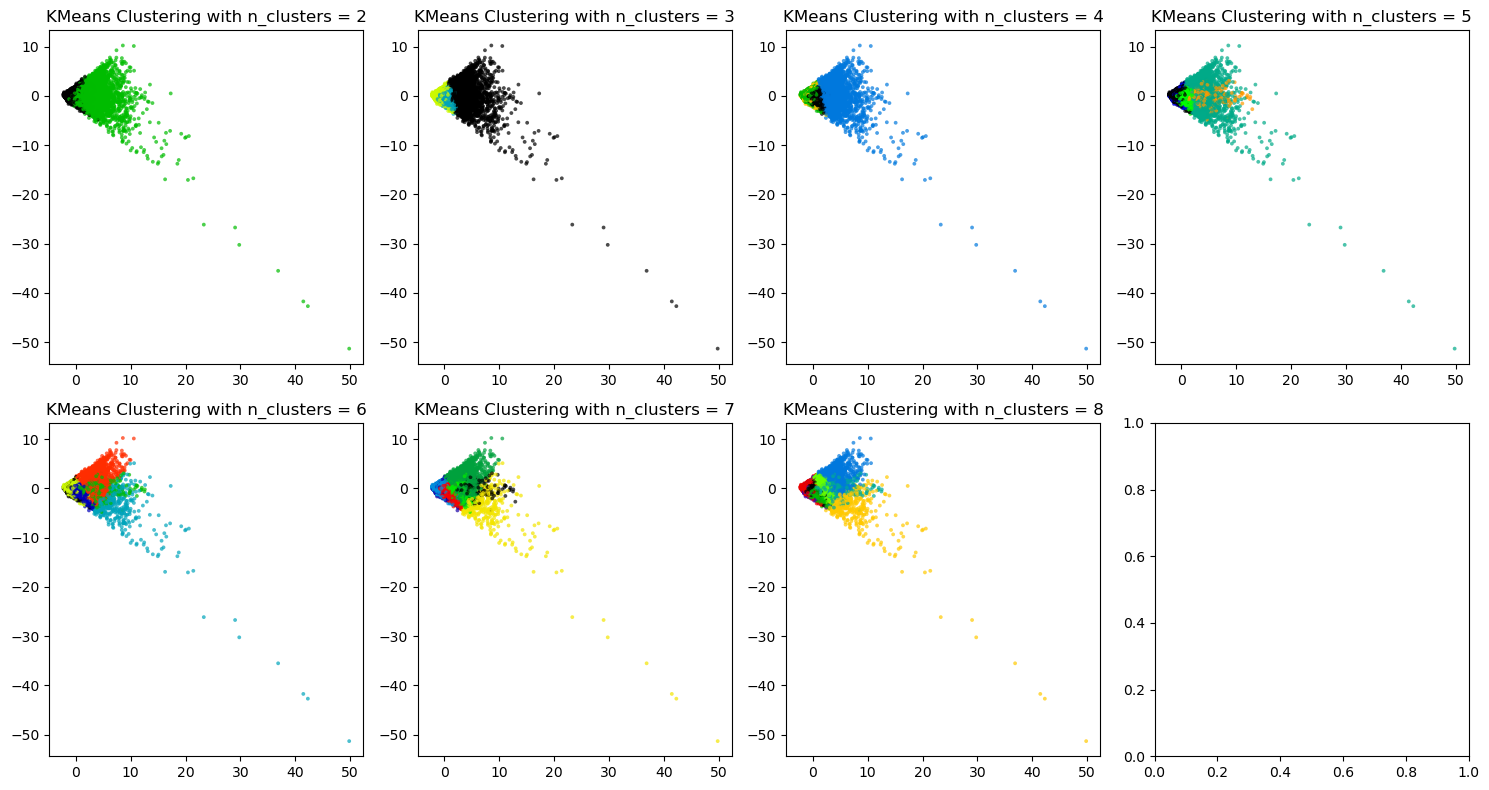

In [131]:
# selecting the top 5 features based on mutual information scores
hospital_data_subset = hospital_data_imp_df[['num_lab_procedures', 'number_emergency', 'num_procedures', 'number_outpatient', 'num_medications']]

# kmeans clustering on mice data subset
n_clusters = range(2, 9)
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(hospital_data_subset)
    silhouette_avg = silhouette_score(hospital_data_subset, cluster_labels)
    print(f'For n_clusters = {n}, the average silhouette_score is : {silhouette_avg}')

# plot clusters
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, n in enumerate(n_clusters):
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(hospital_data_subset)
    
    # scatter plot for all clusters

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    axes[i].scatter(hospital_data_subset.iloc[:, 0], hospital_data_subset.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    axes[i].set_title(f'KMeans Clustering with n_clusters = {n}')
    
plt.tight_layout()
plt.show()


4. [Extra Credit: 10 points] Try to maximize performance using a supervised method.
Points will be awarded based on the relative rank of students who participate in the extra credit. Include the workbook in your submission.
